In [70]:
#!pip install mlxtend

In [69]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv(r"/content/Groceries.csv")
df

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df.fillna('!',inplace=True)
trans = df.values.tolist()

In [73]:
for i in range(len(trans)):
    trans[i] = [x for x in trans[i] if not x=='!']

In [74]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(trans).transform(trans)
transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [75]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(10)

Processing 618 combinations | Sampling itemset size 6


,support,itemsets
0,0.006777,(Instant food products)
1,0.028886,(UHT-milk)
2,0.003222,(abrasive cleaner)
3,0.002666,(artif. sweetener)
4,0.015665,(baking powder)
5,0.002333,(bathroom cleaner)
6,0.044328,(beef)
7,0.028330,(berries)
8,0.023664,(beverages)
9,0.070881,(bottled beer)


In [76]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [77]:
freq_items.sort_values('length',ascending=False)

,support,itemsets,length
9425,0.001111,"(other vegetables, root vegetables, tropical f...",6
9424,0.001333,"(other vegetables, root vegetables, tropical f...",6
9423,0.001333,"(other vegetables, root vegetables, tropical f...",6
9422,0.001111,"(other vegetables, root vegetables, tropical f...",6
9421,0.001444,"(other vegetables, root vegetables, citrus fru...",6
...,...,...,...
103,0.049661,(pork),1
102,0.005555,(popcorn),1
101,0.066437,(pip fruit),1
100,0.016665,(pickled vegetables),1


In [84]:
rules = association_rules(freq_items, metric="lift", min_threshold=0.001)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Instant food products),(butter),0.006777,0.048550,0.001222,0.180328,3.714259,0.000893,1.160769,0.735754
1,(butter),(Instant food products),0.048550,0.006777,0.001222,0.025172,3.714259,0.000893,1.018870,0.768057
2,(Instant food products),(curd),0.006777,0.046328,0.001111,0.163934,3.538546,0.000797,1.140666,0.722293
3,(curd),(Instant food products),0.046328,0.006777,0.001111,0.023981,3.538546,0.000797,1.017626,0.752248
4,(Instant food products),(hamburger meat),0.006777,0.027886,0.002444,0.360656,12.933316,0.002255,1.520486,0.928976
...,...,...,...,...,...,...,...,...,...,...
65859,(root vegetables),"(other vegetables, tropical fruit, whipped/sou...",0.095767,0.002333,0.001111,0.011601,4.972379,0.000888,1.009377,0.883499
65860,(tropical fruit),"(other vegetables, root vegetables, whipped/so...",0.090657,0.002222,0.001111,0.012255,5.515319,0.000910,1.010157,0.900305
65861,(whipped/sour cream),"(other vegetables, root vegetables, tropical f...",0.063326,0.003555,0.001111,0.017544,4.934759,0.000886,1.014238,0.851263
65862,(whole milk),"(other vegetables, root vegetables, tropical f...",0.222420,0.001666,0.001111,0.004995,2.997336,0.000740,1.003345,0.856980


In [86]:
#to remove irrelevant associations with very high lift and confidence values
max_confidence = 0.9
max_lift = 15

rules = rules[(rules['confidence'] <= max_confidence) & (rules['lift'] <= max_lift)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Instant food products),(butter),0.006777,0.048550,0.001222,0.180328,3.714259,0.000893,1.160769,0.735754
1,(butter),(Instant food products),0.048550,0.006777,0.001222,0.025172,3.714259,0.000893,1.018870,0.768057
2,(Instant food products),(curd),0.006777,0.046328,0.001111,0.163934,3.538546,0.000797,1.140666,0.722293
3,(curd),(Instant food products),0.046328,0.006777,0.001111,0.023981,3.538546,0.000797,1.017626,0.752248
4,(Instant food products),(hamburger meat),0.006777,0.027886,0.002444,0.360656,12.933316,0.002255,1.520486,0.928976
...,...,...,...,...,...,...,...,...,...,...
65859,(root vegetables),"(other vegetables, tropical fruit, whipped/sou...",0.095767,0.002333,0.001111,0.011601,4.972379,0.000888,1.009377,0.883499
65860,(tropical fruit),"(other vegetables, root vegetables, whipped/so...",0.090657,0.002222,0.001111,0.012255,5.515319,0.000910,1.010157,0.900305
65861,(whipped/sour cream),"(other vegetables, root vegetables, tropical f...",0.063326,0.003555,0.001111,0.017544,4.934759,0.000886,1.014238,0.851263
65862,(whole milk),"(other vegetables, root vegetables, tropical f...",0.222420,0.001666,0.001111,0.004995,2.997336,0.000740,1.003345,0.856980


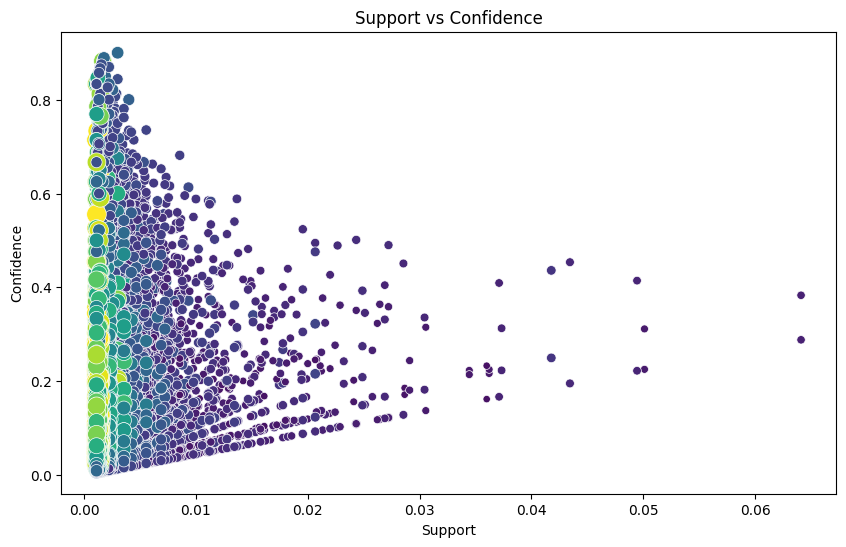

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of support vs. confidence, with lift as the color
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', data=rules, palette='viridis', legend=None)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [88]:
# Example thresholds
min_support = 0.01
min_confidence = 0.3
min_lift = 1.2
top_n = 20

# Filter rules based on thresholds
filtered_rules = rules[(rules['support'] >= min_support) &
                       (rules['confidence'] >= min_confidence) &
                       (rules['lift'] >= min_lift)]

# Select top associations by lift
top_associations = filtered_rules.sort_values(by='lift', ascending=False).head(top_n)
top_associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29518,"(tropical fruit, other vegetables)",(root vegetables),0.030441,0.095767,0.011332,0.372263,3.887166,0.008417,1.440464,0.766063
294,(beef),(root vegetables),0.044328,0.095767,0.015109,0.340852,3.559176,0.010864,1.371821,0.752388
29519,"(tropical fruit, root vegetables)",(other vegetables),0.019442,0.167315,0.011332,0.582857,3.483597,0.008079,1.996163,0.727076
29549,"(other vegetables, whole milk)",(root vegetables),0.064104,0.095767,0.020664,0.322357,3.366050,0.014525,1.334379,0.751062
29555,"(other vegetables, yogurt)",(root vegetables),0.037329,0.095767,0.011665,0.312500,3.263124,0.008090,1.315248,0.720439
32117,"(tropical fruit, whole milk)",(root vegetables),0.037107,0.095767,0.011221,0.302395,3.157609,0.007667,1.296196,0.709637
33059,"(tropical fruit, whole milk)",(yogurt),0.037107,0.119320,0.013443,0.362275,3.036165,0.009015,1.380972,0.696481
29556,"(root vegetables, yogurt)",(other vegetables),0.023220,0.167315,0.011665,0.502392,3.002678,0.007780,1.673377,0.682819
29998,"(tropical fruit, other vegetables)",(yogurt),0.030441,0.119320,0.010554,0.346715,2.905759,0.006922,1.348080,0.676448
29352,"(root vegetables, rolls/buns)",(other vegetables),0.021220,0.167315,0.010221,0.481675,2.878858,0.006671,1.606494,0.666789


The other vegetables is not adding any value to the insights

In [89]:
index_to_remove = top_associations[
    top_associations['antecedents'].apply(lambda x: 'other vegetables' in x) |
    top_associations['consequents'].apply(lambda x: 'other vegetables' in x)
].index

filtered_top_associations = top_associations.drop(index_to_remove)
filtered_top_associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
294,(beef),(root vegetables),0.044328,0.095767,0.015109,0.340852,3.559176,0.010864,1.371821,0.752388
32117,"(tropical fruit, whole milk)",(root vegetables),0.037107,0.095767,0.011221,0.302395,3.157609,0.007667,1.296196,0.709637
33059,"(tropical fruit, whole milk)",(yogurt),0.037107,0.119320,0.013443,0.362275,3.036165,0.009015,1.380972,0.696481
2216,(cream cheese ),(yogurt),0.034107,0.119320,0.011665,0.342020,2.866404,0.007596,1.338459,0.674123
2316,(curd),(yogurt),0.046328,0.119320,0.015109,0.326139,2.733313,0.009582,1.306916,0.664949
32182,"(root vegetables, yogurt)",(whole milk),0.023220,0.222420,0.013665,0.588517,2.645974,0.008501,1.889701,0.636855
32183,"(root vegetables, whole milk)",(yogurt),0.043440,0.119320,0.013665,0.314578,2.636421,0.008482,1.284873,0.648885
